In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.spatial.transform import Rotation as R

In [2]:
def back_proj(d, pose):
    u, v = np.meshgrid(np.arange(d.shape[1]), np.arange(d.shape[0]))
    fx = float(pose[-4])
    fy = float(pose[-3])
    cx = float(pose[-2])
    cy = float(pose[-1])
    x = (u - cx)*d/fx
    y = (v - cy)*d/fy
    z = d
    pc = np.concatenate([z[::3,::3].reshape(-1,1), x[::3,::3].reshape(-1,1), -y[::3,::3].reshape(-1,1), np.ones((x.shape[0]*x.shape[1]//9,1))], axis = 1)
    
    q = np.asarray([float(pose[7]), float(pose[5]), -float(pose[6]), -float(pose[4])])
    Rot = R.from_quat(q).as_matrix()
    trans = np.asarray([float(pose[3]), float(pose[1]), -float(pose[2])])
    M = np.zeros((4,4))
    M[:3,:3] = Rot
    M[:3,3] = trans
    M[3,3] = 1
    print(trans, R.from_matrix(Rot).as_euler('xyz', degrees = True))
    pcw = (M@pc.T).T
    return pcw, pc

[-3.007685  5.71901   1.755369] [-6.51728107e-04  3.27271207e+00 -7.45796385e+01]
[-3.696189  6.071423  1.748963] [-5.72265653e-04  6.51576190e+00 -6.74248617e+01]


Text(0.5, 0.92, 'Side View')

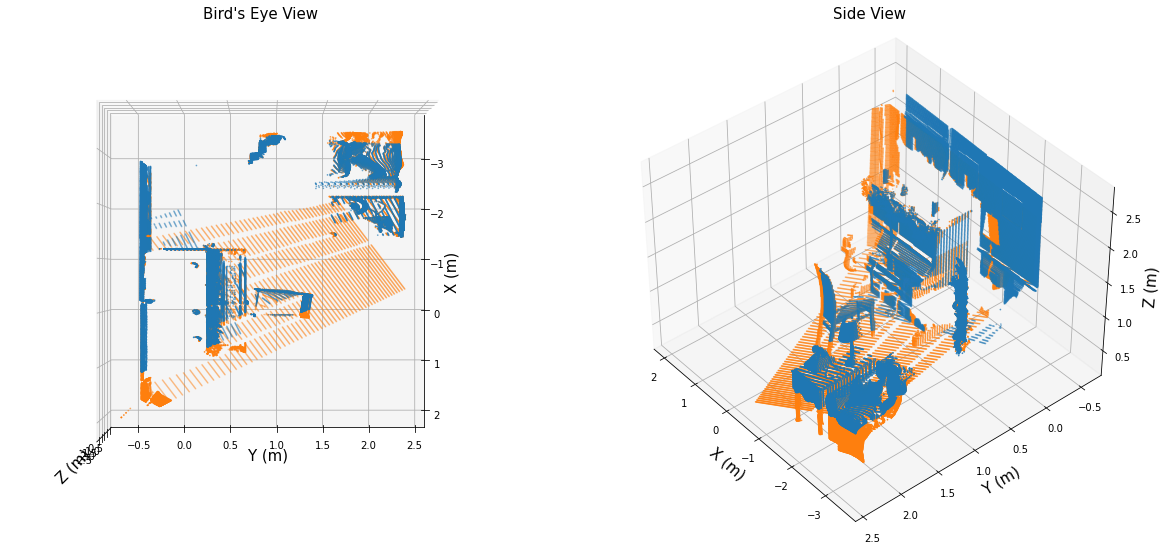

In [3]:
fidx1 = 100
d1 = np.load('xmas_shot5.{:04d}.npy'.format(fidx1))
with open('CameraPoses.csv', 'r') as f:
    cam_traj = f.read().splitlines()[1:]
pose1 = cam_traj[fidx1].split(',')
pcw1, pc1 = back_proj(d1, pose1)

fidx2 = 120
d2 = np.load('xmas_shot5.{:04d}.npy'.format(fidx2))
pose2 = cam_traj[fidx2].split(',')
pcw2, pc2 = back_proj(d2, pose2)

fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(121,projection='3d')
ax.scatter(pcw1[:,0], pcw1[:,1], pcw1[:,2], s=0.5)
ax.scatter(pcw2[:,0], pcw2[:,1], pcw2[:,2], s=0.5)
ax.set_xlabel('X (m)', fontsize = 15.0)
ax.set_ylabel('Y (m)', fontsize = 15.0)
ax.set_zlabel('Z (m)', fontsize = 15.0)
ax.view_init(elev=90, azim=0)
ax.set_title("Bird's Eye View", fontsize = 15.0)

ax = fig.add_subplot(122,projection='3d')
ax.scatter(pcw1[:,0], pcw1[:,1], pcw1[:,2], s=0.5)
ax.scatter(pcw2[:,0], pcw2[:,1], pcw2[:,2], s=0.5)
ax.set_xlabel('X (m)', fontsize = 15.0)
ax.set_ylabel('Y (m)', fontsize = 15.0)
ax.set_zlabel('Z (m)', fontsize = 15.0)
ax.view_init(elev=40, azim=140)
ax.set_title("Side View", fontsize = 15.0)